<font size = '5' color='black'>sklearn.neighbors</font> provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant <b>(k-nearest neighbor learning)</b>, or vary based on the local density of points <b>(radius-based neighbor learning)</b>. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.


<font color='red'>Source : https://scikit-learn.org/stable/modules/neighbors.html#neighbors </font>

# <font color='burgundy' size='5'> Nearest Neighbors Regression </font>


Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scikit-learn implements two different neighbors regressors: KNeighborsRegressor implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius  of the query point, where  is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights
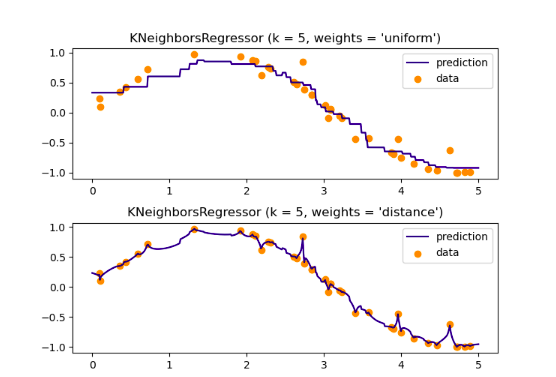
The use of multi-output nearest neighbors for regression is demonstrated in Face completion with a multi-output estimators. In this example, the inputs X are the pixels of the upper half of faces and the outputs Y are the pixels of the lower half of those faces.


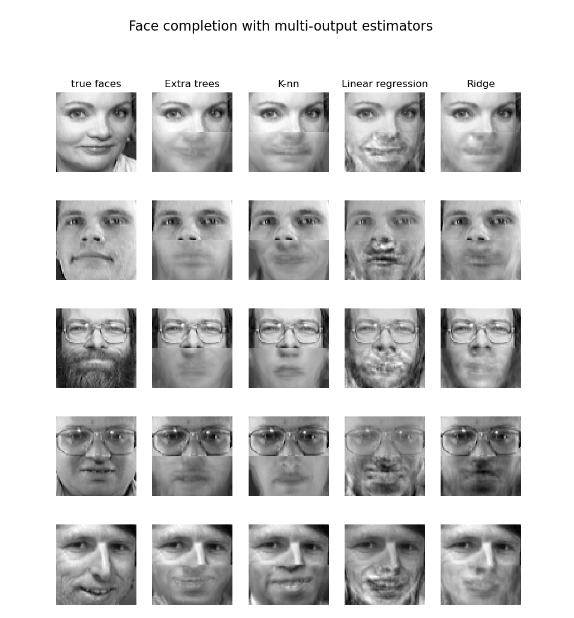

#### load the boston dataset, the data splitter, metrics and the KNR 


In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [2]:
boston_data = load_boston()

/home/balha/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

#### split data into dependent and independent


In [3]:
X = boston_data.data
y = boston_data.target

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

#### split data into train and test


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

#### K-nearst neighbor regressor object

<font size='3'><b> class sklearn.neighbors</b></font> .KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
- n_neighbors :  Number of neighbors to use by default for kneighbors queries (default=5).
- weights{‘uniform’, ‘distance’} or callable, default=’uniform’
 Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

In [13]:
KNR_model = KNeighborsRegressor(n_neighbors=6,weights='uniform',algorithm='auto')

In [14]:
KNR_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [15]:
print('KNeighborsRegressorModel Train Score is : ' , KNR_model.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNR_model.score(X_test, y_test))

KNeighborsRegressorModel Train Score is :  0.6578222697500758
KNeighborsRegressorModel Test Score is :  0.52835683958258


In [23]:
y_pred = KNR_model.predict(X_test)
y_pred[:5]

array([20.38333333, 12.3       , 24.23333333, 20.58333333, 24.35      ])

#### calculate the error

In [25]:
MAE = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
MSE = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('the mean absolute error is : ',MAE)
print('the mean squared error is : ',MSE)


the mean absolute error is :  4.358442982456141
the mean squared error is :  38.7802576754386


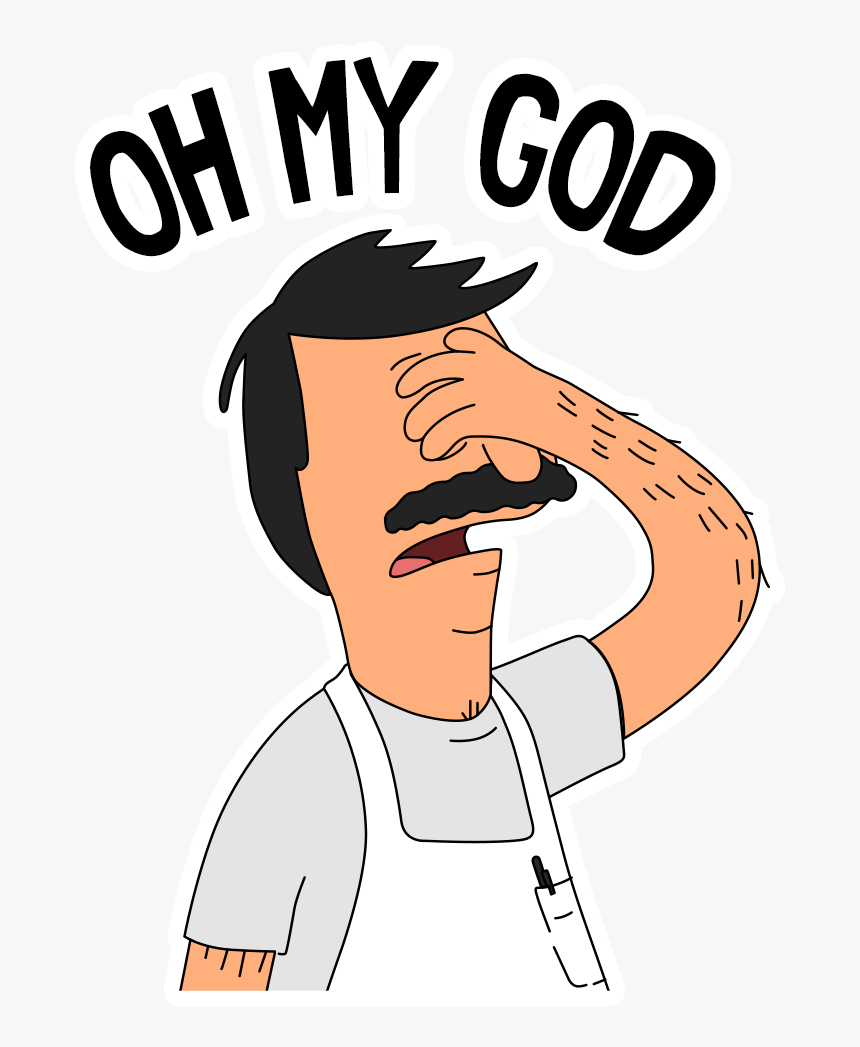

# <font color='burgundy' size='5'> Nearest Neighbors Classifier</font>
